ControlLDM 最大的，
ControlLDM.apply_model() return eps given x_noisy, t ,cond,
cond = [c_concat] =IMAGE
[c_crossattn] = text


In [ ]:
import open_clip
from PIL import Image
import torch
model_clip, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14', pretrained='../autodl-tmp/open_clip_pytorch_model.bin')
model_clip = model_clip.to('cuda')

In [ ]:
from torchvision.transforms import Resize 
 
torch_resize = Resize([224,224])
im1_resize = torch_resize(img1)

In [ ]:
tensor = torch.rand([1,3,2,2])
gray_tensor = torch.sum(tensor * torch.tensor([0.299, 0.587, 0.114]).view(1, 3, 1, 1), dim=1, keepdim=True)


In [ ]:
image = preprocess(Image.open("./test_imgs/building.png")).unsqueeze(0)
model_clip.encode_image(im1_resize.to('cuda'))

In [ ]:

out_image = first_stage_model.encoder(image.to('cuda')).to('cuda')
x.requires_grad_(True)
optimizer = torch.optim.Adam([x], lr=0.1)
num_iters = 200
for cur_iter in range(num_iters):
    print(cur_iter)
    x_out = first_stage_model.encoder(x)
    loss1 = (x_out - out_image).pow(2).mean()
    loss1.backward(retain_graph=True)
    optimizer.step()
    optimizer.zero_grad(set_to_none=True)

In [ ]:
source1 = cv2.imread("./4.png")
input_image1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
input_image1 = HWC3(input_image1)
img1 = resize_image(input_image1, 224)
img1 = torch.tensor(np.array(img1)).permute(2,0,1).unsqueeze(0).cuda()
img1 = img1.float() / 127.5 - 1.0
model_clip.encode_image(img1)

In [ ]:
import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.canny import CannyDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler
from annotator.midas import MidasDetector
from annotator.zoe import ZoeDetector

preprocessor = None

model_name = 'control_v11p_sd15_canny'
model = create_model(f'./models/{model_name}.yaml').cpu()
model.load_state_dict(load_state_dict('../autodl-tmp/v1-5-pruned.ckpt', location='cuda'), strict=False)
model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
model = model.cuda()
ddim_sampler = DDIMSampler(model)
first_stage_model = model.get_first_stage_model()

In [1]:
import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.canny import CannyDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler
from annotator.midas import MidasDetector
from annotator.zoe import ZoeDetector
model_name = 'control_v11f1p_sd15_depth'
model_depth = create_model(f'./models/{model_name}.yaml').cpu()
model_depth.load_state_dict(load_state_dict('../autodl-tmp/v1-5-pruned.ckpt', location='cuda'), strict=False)
model_depth.load_state_dict(load_state_dict(f'../autodl-tmp/{model_name}.pth', location='cuda'), strict=False)
model_depth = model_depth.cuda()
ddim_sampler_depth = DDIMSampler(model_depth)

/root/miniconda3/envs/ldm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No module 'xformers'. Proceeding without it.
ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Loaded model config from [./models/control_v11f1p_sd15_depth.yaml]
Loaded state_dict from [../autodl-tmp/v1-5-pruned.ckpt]
Loaded state_dict from [../autodl-tmp/control_v11f1p_sd15_depth.pth]


In [ ]:
import torchvision
torchvision.utils.save_image(((one+1)*127.5)/255,"3.png")

In [ ]:
one = Return_detected_map(path = "./test_imgs/building.png",detect_resolution = 512,low_threshold = 100,high_threshold=200,det = 'canny')

In [2]:
import cv2
from annotator.util import HWC3
import einops
from PIL import Image
from annotator.midas import MidasDetector
from annotator.zoe import ZoeDetector
import numpy as np
def slerp(p0, p1, fract_mixing: float):
    r""" Copied from lunarring/latentblending
    Helper function to correctly mix two random variables using spherical interpolation.
    The function will always cast up to float64 for sake of extra 4.
    Args:
        p0: 
            First tensor for interpolation
        p1: 
            Second tensor for interpolation
        fract_mixing: float 
            Mixing coefficient of interval [0, 1]. 
            0 will return in p0
            1 will return in p1
            0.x will return a mix between both preserving angular velocity.
    """ 
    if p0.dtype == torch.float16:
        recast_to = 'fp16'
    else:
        recast_to = 'fp32'
    
    p0 = p0.double()
    p1 = p1.double()
    norm = torch.linalg.norm(p0) * torch.linalg.norm(p1)
    epsilon = 1e-7
    dot = torch.sum(p0 * p1) / norm
    dot = dot.clamp(-1+epsilon, 1-epsilon)
    
    theta_0 = torch.arccos(dot)
    sin_theta_0 = torch.sin(theta_0)
    theta_t = theta_0 * fract_mixing
    s0 = torch.sin(theta_0 - theta_t) / sin_theta_0
    s1 = torch.sin(theta_t) / sin_theta_0
    interp = p0*s0 + p1*s1
    
    if recast_to == 'fp16':
        interp = interp.half()
    elif recast_to == 'fp32':
        interp = interp.float()
        
    return interp
def resize_image_to_squra(path, resolution):
        
    source = cv2.imread(path)
    source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
    input_image = HWC3(source)
    H, W, C = input_image.shape
    H = float(H)
    W = float(W)
    k = float(resolution) / min(H, W)
    H = resolution
    W = resolution
    H = int(np.round(H / 64.0)) * 64
    W = int(np.round(W / 64.0)) * 64
    img = cv2.resize(input_image, (W, H), interpolation=cv2.INTER_LANCZOS4 if k > 1 else cv2.INTER_AREA)
    return img
def Return_detected_map(path = "./test_imgs/building.png",detect_resolution = 512,low_threshold = 100,high_threshold=200,det = 'canny'):
    input_image = cv2.imread(path)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    if det == 'canny':
        preprocessor = CannyDetector()
    if det == 'Depth_Zoe':
        preprocessor = ZoeDetector()
    if det == 'Depth_Mias':
        preprocessor = CannyDetector()
    with torch.no_grad():
        input_image = HWC3(input_image)
        if det == 'canny':
            preprocessor = CannyDetector()
            detected_map = preprocessor(resize_image(input_image, detect_resolution), low_threshold, high_threshold)
        if det == 'Depth_Zoe':
            preprocessor = ZoeDetector()
            detected_map = preprocessor(resize_image(input_image,detect_resolution ))
        if det == 'Depth_Mias':
            preprocessor = CannyDetector()

        detected_map = HWC3(detected_map)
        img = resize_image(input_image, detect_resolution)
        H, W, C = img.shape
        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)
        detected_map = torch.tensor(np.array(detected_map)).permute(2,0,1).unsqueeze(0).cuda()
        detected_map = detected_map.float() / 127.5 - 1.0
    return detected_map
def learn_conditioning( model, ddim_sampler,img1, cond_base, uncond_base, ddim_steps, guide_scale, num_iters=200, cond_lr=1e-4):
    cond = {"c_crossattn": [cond_base], 'c_concat': None}
    un_cond = {"c_crossattn": [uncond_base], 'c_concat': None}
    ldm = model
    uncond_base.requires_grad_(True)
    cond1 = cond_base.clone()
    cond1.requires_grad_(True)
    optimizer = torch.optim.Adam([cond1, uncond_base], lr=cond_lr) #
    T = ddim_steps
    ddim_sampler.make_schedule(T, verbose=False)
    for cur_iter in range(num_iters):
        L1 = ldm.get_first_stage_encoding(ldm.encode_first_stage(img1))
        with torch.autocast('cuda'):
            u = np.random.randint(T//3, 2*T//3)
            t_u = ddim_sampler.ddim_timesteps[u]
            tu = torch.tensor([t_u], device='cuda', dtype=torch.long)

            cond["c_crossattn"] = [cond1]
            noise = torch.randn_like(L1)
            x_t_u = ldm.sqrt_alphas_cumprod[t_u] * L1 + \
                ldm.sqrt_one_minus_alphas_cumprod[t_u] * noise
            eps = ddim_sampler.pred_eps(x_t_u, cond, tu, unconditional_guidance_scale=guide_scale, unconditional_conditioning=un_cond)
            loss1 = (eps - noise).pow(2).mean()
            loss1.backward()
            optimizer.step()
            optimizer.zero_grad(set_to_none=True)

    cond1.requires_grad_(False)
    uncond_base.requires_grad_(False)
    return cond1,uncond_base
def Combine_condition(img1,img2, ldm, alpha = 0.5):
    img1 = torch.tensor(np.array(img1)).permute(2,0,1).unsqueeze(0).cuda()
    img2 = torch.tensor(np.array(img2)).permute(2,0,1).unsqueeze(0).cuda()
    L1 = ldm.get_first_stage_encoding(ldm.encode_first_stage(img1.float() / 127.5 - 1.0))
    L2 = ldm.get_first_stage_encoding(ldm.encode_first_stage(img2.float() / 127.5 - 1.0))
    return slerp(L1,L2, alpha)
def extract_into_tensor(a, t, x_shape):
    b, *_ = t.shape
    out = a.gather(-1, t)
    return out.reshape(b, *((1,) * (len(x_shape) - 1)))
def resize_image(input_image, resolution):
    H, W, C = input_image.shape
    H = float(H)
    W = float(W)
    k = float(resolution) / min(H, W)
    H = resolution
    W = resolution
    H = int(np.round(H / 64.0)) * 64
    W = int(np.round(W / 64.0)) * 64
    img = cv2.resize(input_image, (W, H), interpolation=cv2.INTER_LANCZOS4 if k > 1 else cv2.INTER_AREA)
    return img
def tensor_to_array(input_image,time_num = 127.5):
    if len(input_image.shape) == 3:
        out  = einops.rearrange(input_image, 'c h w -> h w c')
        if time_num == 127.5:
             out = (out* 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)
        else:
            out = (out* 255).cpu().numpy().clip(0, 255).astype(np.uint8)
    else:
        out  = einops.rearrange(input_image, 'b c h w -> b h w c')
        if time_num == 127.5:
             out = (out* 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)
        else:
            out = (out* 255).cpu().numpy().clip(0, 255).astype(np.uint8)
        out = out.squeeze(0)
    return out

source = cv2.imread("./b.png")
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
prompt = 'best qualit, reality'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'
num_samples = 1
image_resolution = 512
detect_resolution=512
ddim_steps = 25
guess_mode =None
strength = 1
scale = 5 
seed = 4
eta = 1
low_threshold = 100
high_threshold = 200


In [ ]:
import tqdm
@torch.no_grad()
def invert(input_image,  model, image_resolution,
           num_samples, a_prompt, n_prompt, prompt, ddim_sampler, control = None,guide_scale=7.5, num_inference_steps=100,
           device='cuda',eta=1,get_image = False):
  
    # Encode prompt
    input_image = HWC3(input_image)
    img1 = resize_image(input_image, image_resolution)
    H,W,C = img1.shape
    ddim_sampler.make_schedule(num_inference_steps,verbose = False)
    
    intermediate_latents = []
    timesteps = ddim_sampler_depth.ddim_timesteps
    cond = { "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)],"c_concat": [control] if control is not None else None}
    un_cond = {"c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)],"c_concat": None }
    model.control_scales = ([1] * 13)

    img1 = torch.tensor(np.array(input_image)).permute(2,0,1).unsqueeze(0).cuda()
    L1 = model.get_first_stage_encoding(model.encode_first_stage(img1.float() / 127.5 - 1.0))
    latents = L1
    # Reversed timesteps <<<<<<<<<<<<<<<<<<<<
    out = []
    for i in range(1, num_inference_steps):

        # We'll skip the final iteration
        if i >= num_inference_steps - 1: continue

        t = timesteps[i]
        t = torch.tensor([t], dtype=torch.long, device='cuda')
        
        # Expand the latents if we are doing classifier free guidance
        latent_model_input = latents

        # Predict the noise residual
        noise_pred =  ddim_sampler.pred_eps(latents, cond, t, unconditional_guidance_scale=guide_scale, unconditional_conditioning=un_cond)


        current_t = max(0, t.item() - (1000//num_inference_steps)) 
        next_t = t 
        alpha_t = ddim_sampler.alphas_cumprod[current_t]
        alpha_t_next = ddim_sampler.alphas_cumprod[next_t]
        # Inverted update step (re-arranging the update step to get x(t) (new latents) as a function of x(t-1) (current latents)
        #latents = (latents - (1-alpha_t).sqrt()*noise_pred)*(alpha_t_next.sqrt()/alpha_t.sqrt()) + (1-alpha_t_next).sqrt()*noise_pred
        latents = latents*(alpha_t_next.sqrt()/alpha_t.sqrt()) + ((1/alpha_t_next - 1).sqrt() + (1/alpha_t - 1).sqrt())*noise_pred

        # Store
        intermediate_latents.append(latents)
        if(i%250 == 0) and get_image:
            shape = (4, H // 8, W // 8)
            # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
            samples, intermediates = ddim_sampler.sample(num_inference_steps, num_samples,
                                                        shape, cond, verbose=False, eta=eta,
                                                        x_T=latents,
                                                        timesteps=int(i),
                                                        unconditional_guidance_scale=guide_scale,
                                                        unconditional_conditioning=un_cond)

            x_samples = model.decode_first_stage(samples)
            x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)
            out.append(x_samples)
    return torch.cat(intermediate_latents),out
def naive_invert(input_image,  model, image_resolution,
           num_samples, a_prompt, n_prompt, prompt, ddim_sampler, control = None,guide_scale=7.5, num_inference_steps=100,
           device='cuda',eta=1,get_image = False):
  
    # Encode prompt
    input_image = HWC3(input_image)
    img1 = resize_image(input_image, image_resolution)
    H,W,C = img1.shape
    ddim_sampler.make_schedule(num_inference_steps,verbose = False)
    
    intermediate_latents = []
    timesteps = ddim_sampler_depth.ddim_timesteps
    cond = { "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)],"c_concat": [control] if control is not None else None}
    un_cond = {"c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)],"c_concat": None }
    model.control_scales = ([1] * 13)

    img1 = torch.tensor(np.array(input_image)).permute(2,0,1).unsqueeze(0).cuda()
    L1 = model.get_first_stage_encoding(model.encode_first_stage(img1.float() / 127.5 - 1.0))
    latents = L1
    # Reversed timesteps <<<<<<<<<<<<<<<<<<<<
    out = []
    for i in range(1, num_inference_steps):

        # We'll skip the final iteration
        if i >= num_inference_steps - 1: continue

        t = timesteps[i]
        t = torch.tensor([t], dtype=torch.long, device='cuda')
        print(t/1000, i/num_inference_steps)
        noise = torch.randn_like(latents)
        noisy_latents = (extract_into_tensor(model.sqrt_alphas_cumprod, t, latents.shape) * latents +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, latents.shape) * noise)
        noisy_latents = noisy_latents.squeeze(0)
        noisy_latents = torch.stack([noisy_latents for _ in range(num_samples)], dim=0)

        intermediate_latents.append(noisy_latents)
        if(i%10 == 0) and get_image:
            shape = (4, H // 8, W // 8)
            # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
            samples, intermediates = ddim_sampler.sample(num_inference_steps, num_samples,
                                                        shape, cond, verbose=False, eta=eta,
                                                        x_T=noisy_latents,
                                                        timesteps=int(i),
                                                        unconditional_guidance_scale=guide_scale,
                                                        unconditional_conditioning=un_cond)

            x_samples = model.decode_first_stage(samples)
            x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)
            out.append(x_samples)
    return torch.cat(intermediate_latents),out

In [ ]:
from PIL import Image
imgg = Image.fromarray(_[0][0])
imgg

In [ ]:
import os
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
prompt = 'best qualit'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'
out,_ = invert(input_image = source1,  model= model_depth, image_resolution= 512,
           num_samples = 1, a_prompt=a_prompt,
               n_prompt = n_prompt, prompt = prompt, ddim_sampler = ddim_sampler_depth, control = None,guide_scale=7.5, num_inference_steps=500,
           device='cuda',eta = 1,get_image=True)

In [3]:
from torchvision.transforms import Resize 
def process_interpolation_add_noise_diffuse_for_loop(det, input_image1, input_image2, alpha,alpha_fram, time_frac,
                          ddim_sampler,model, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold,clip_model,lamda, in_latend_space,grayscale):

    input_image1 = HWC3(input_image1)
    input_image2 = HWC3(input_image2)

    if det == 'Canny':
        preprocessor = CannyDetector()
        detected_map1 = preprocessor(resize_image(input_image1, detect_resolution), low_threshold, high_threshold)
    if det == 'Depth_Zoe':
        preprocessor = ZoeDetector()
        detected_map1 = preprocessor(resize_image(input_image1, detect_resolution))
        detected_map2 = preprocessor(resize_image(input_image2, detect_resolution))
    detected_map1 = HWC3(detected_map1)
    detected_map2 = HWC3(detected_map2)
    
    img1 = resize_image(input_image1, image_resolution)
    img2 = resize_image(input_image2, image_resolution)
    H, W, C = img1.shape

    detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
    detected_map2 = cv2.resize(detected_map2, (W, H), interpolation=cv2.INTER_LINEAR)

    control1 = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
    control2 = torch.from_numpy(detected_map2.copy()).float().cuda() / 255.0
    control = slerp(control1,control2,alpha_fram)
    control = torch.stack([control for _ in range(num_samples)], dim=0)
    control = einops.rearrange(control, 'b h w c -> b c h w').clone()

    if seed == -1:
        seed = random.randint(0, 65535)
    seed_everything(seed)
    torch_resize = Resize([224,224])

    img1 = torch.tensor(np.array(input_image1)).permute(2,0,1).unsqueeze(0).cuda()
    img1 = img1.float() / 127.5 - 1.0
    
    img1_gray = img1*127.5 + 127.5
    gray_tensor_2 = torch.sum(img1_gray * torch.tensor([0.299, 0.587, 0.114]).view(1, 3, 1, 1).cuda(), dim=1, keepdim=True)
    
    img2 = torch.tensor(np.array(input_image2)).permute(2,0,1).unsqueeze(0).cuda()
    gabi  = torch_resize(img1)
    if clip_model is not None:
        clip_encode_img1 = clip_model.encode_image(gabi)
    L1 = model.get_first_stage_encoding(model.encode_first_stage(img1))
    Original_L1 = L1.detach().clone()
    L2 = model.get_first_stage_encoding(model.encode_first_stage(img2.float() / 127.5 - 1.0))
    T = int(time_frac* model.num_timesteps)
    t = torch.tensor([T], dtype=torch.long, device='cuda')
    noise = torch.randn_like(L1)
    L1 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L1.shape) * L1 +
        extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L1.shape) * noise)
    L2 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L2.shape) * L2 +
        extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L2.shape) * noise)
    noisy_latents = slerp(L1,L2,alpha)
    noisy_latents = noisy_latents.squeeze(0)
    noisy_latents = torch.stack([noisy_latents for _ in range(num_samples)], dim=0)
    noisy_latents.requires_grad_()
    print(noisy_latents.shape)

    cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
    un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
    shape = (4, H // 8, W // 8)

    model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
    # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
    
    ddim_sampler.make_schedule(ddim_steps,ddim_eta=eta,verbose = False)

    intermediate_latents = []
    timesteps = ddim_sampler_depth.ddim_timesteps
    timesteps = timesteps[0:int(timesteps.shape[0]*time_frac)]
    timesteps = np.flip(timesteps)
    total_steps = timesteps.shape[0]
    for i, step in enumerate(timesteps):
        print(i)
        torch.cuda.empty_cache()
        index = total_steps - i - 1
        t = torch.tensor([step], dtype=torch.long, device='cuda')
        noisy_latent, pre_x0 = ddim_sampler.p_sample_ddim(noisy_latents, cond, t, index=index, unconditional_guidance_scale=scale,
        unconditional_conditioning=un_cond)
        if grayscale:
            pre_x0_out = model.decode_first_stage(pre_x0)
            pre_x0_out = pre_x0_out* 127.5 + 127.5
            gray_tensor = torch.sum(pre_x0_out * torch.tensor([0.299, 0.587, 0.114]).view(1, 3, 1, 1).cuda(), dim=1, keepdim=True)

            differece = gray_tensor - gray_tensor_2
            norm = torch.linalg.norm(differece)
            norm = norm.mean()
            norm_grad = torch.autograd.grad(outputs= norm, inputs= noisy_latents)[0]
            del pre_x0_out
            del pre_x0
            noisy_latents = (noisy_latent - norm_grad*lamda).detach().clone()
            noisy_latents.requires_grad_()
        if clip_model:
            pre_x0_out = model.decode_first_stage(pre_x0)
            resize_out = torch_resize(pre_x0_out)
            clip_encoder_pre_x0 = clip_model.encode_image(resize_out)
            differece=  clip_encode_img1 - clip_encoder_pre_x0
            norm = torch.linalg.norm(differece)
            norm = norm.mean()

            norm_grad = torch.autograd.grad(outputs= norm, inputs= noisy_latents)[0]
            del clip_encoder_pre_x0
            del pre_x0_out
            del pre_x0
            noisy_latents = (noisy_latent - norm_grad*lamda).detach().clone()
            noisy_latents.requires_grad_()
        if in_latend_space:
            differece=  pre_x0 - Original_L1
            norm = torch.linalg.norm(differece)
            norm = norm.mean()
            norm_grad = torch.autograd.grad(outputs= norm, inputs= noisy_latents)[0]
            del pre_x0
            noisy_latents = (noisy_latent - norm_grad*lamda).detach().clone()
            noisy_latents.requires_grad_()
    x_samples = model.decode_first_stage(noisy_latents)
    x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).detach().cpu().numpy().clip(0, 255).astype(np.uint8)

    results = [x_samples[i] for i in range(num_samples)]
    return results
def process_interpolation(det, input_image1, input_image2, alpha, time_frac,
                          ddim_sampler,model, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold):
    global preprocessor

    with torch.no_grad():
        input_image1 = HWC3(input_image1)
        input_image2 = HWC3(input_image2)

        if det == 'Canny':
            preprocessor = CannyDetector()
            detected_map1 = preprocessor(resize_image(input_image1, detect_resolution), low_threshold, high_threshold)
        if det == 'Depth_Zoe':
            preprocessor = ZoeDetector()
            detected_map1 = preprocessor(resize_image(input_image1, detect_resolution))
            detected_map2 = preprocessor(resize_image(input_image2, detect_resolution))
        detected_map1 = HWC3(detected_map1)
        detected_map2 = HWC3(detected_map2)
        
        img1 = resize_image(input_image1, image_resolution)
        img2 = resize_image(input_image2, image_resolution)
        H, W, C = img1.shape

        detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
        detected_map2 = cv2.resize(detected_map2, (W, H), interpolation=cv2.INTER_LINEAR)

        control1 = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
        control2 = torch.from_numpy(detected_map2.copy()).float().cuda() / 255.0
        control = slerp(control1,control2,alpha)
        print(control.shape)
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)


        img1 = torch.tensor(np.array(input_image1)).permute(2,0,1).unsqueeze(0).cuda()
        img2 = torch.tensor(np.array(input_image2)).permute(2,0,1).unsqueeze(0).cuda()
        L1 = model.get_first_stage_encoding(model.encode_first_stage(img1.float() / 127.5 - 1.0))
        L2 = model.get_first_stage_encoding(model.encode_first_stage(img2.float() / 127.5 - 1.0))
        latents = slerp(L1,L2,alpha)
        T = int(time_frac* model.num_timesteps)
        t = torch.tensor([T], dtype=torch.long, device='cuda')
        noise = torch.randn_like(latents)
        noisy_latents = (extract_into_tensor(model.sqrt_alphas_cumprod, t, latents.shape) * latents +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, latents.shape) * noise)
        noisy_latents = noisy_latents.squeeze(0)
        noisy_latents = torch.stack([noisy_latents for _ in range(num_samples)], dim=0)
        print(noisy_latents.shape)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     x_T=noisy_latents,
                                                     timesteps=int(time_frac * ddim_steps),
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return results
def process_interpolation_add_noise_diffuse(det, input_image1, input_image2, alpha,alpha_fram, time_frac,
                          ddim_sampler,model, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold,only_language = False):
    global preprocessor

    with torch.no_grad():
        input_image1 = HWC3(input_image1)
        input_image2 = HWC3(input_image2)

        if det == 'Canny':
            preprocessor = CannyDetector()
            detected_map1 = preprocessor(resize_image(input_image1, detect_resolution), low_threshold, high_threshold)
            detected_map2 = preprocessor(resize_image(input_image2, detect_resolution), low_threshold, high_threshold)

        if det == 'Depth_Zoe':
            preprocessor = ZoeDetector()
            detected_map1 = preprocessor(resize_image(input_image1, detect_resolution))
            detected_map2 = preprocessor(resize_image(input_image2, detect_resolution))
        detected_map1 = HWC3(detected_map1)
        detected_map2 = HWC3(detected_map2)
        
        img1 = resize_image(input_image1, image_resolution)
        img2 = resize_image(input_image2, image_resolution)
        H, W, C = img1.shape

        detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
        detected_map2 = cv2.resize(detected_map2, (W, H), interpolation=cv2.INTER_LINEAR)

        control1 = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
        control2 = torch.from_numpy(detected_map2.copy()).float().cuda() / 255.0
        control = slerp(control1,control2,alpha_fram)
        print(control.shape)
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)


        img1 = torch.tensor(np.array(input_image1)).permute(2,0,1).unsqueeze(0).cuda()
        img2 = torch.tensor(np.array(input_image2)).permute(2,0,1).unsqueeze(0).cuda()
        L1 = model.get_first_stage_encoding(model.encode_first_stage(img1.float() / 127.5 - 1.0))
        L2 = model.get_first_stage_encoding(model.encode_first_stage(img2.float() / 127.5 - 1.0))
        T = int(time_frac* model.num_timesteps)
        t = torch.tensor([T], dtype=torch.long, device='cuda')
        noise = torch.randn_like(L1)
        L1 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L1.shape) * L1 +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L1.shape) * noise)
        L2 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L2.shape) * L2 +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L2.shape) * noise)
        noisy_latents = slerp(L1,L2,alpha)
        noisy_latents = noisy_latents.squeeze(0)
        noisy_latents = torch.stack([noisy_latents for _ in range(num_samples)], dim=0)
        print(noisy_latents.shape)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        if only_language:
            cond = {"c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)],"c_concat": None }
            un_cond = {"c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)],"c_concat": None}            
        shape = (4, H // 8, W // 8)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     x_T=noisy_latents,
                                                     timesteps=int(time_frac * ddim_steps),
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return results
def process_interpolation_add_noise_diffuse_with_language_interpolation(det, input_image1, input_image2, alpha, time_frac, word1,word2,
                          ddim_sampler,model, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold):
    global preprocessor

    with torch.no_grad():
        input_image1 = HWC3(input_image1)
        input_image2 = HWC3(input_image2)

        if det == 'Canny':
            preprocessor = CannyDetector()
            detected_map1 = preprocessor(resize_image(input_image1, detect_resolution), low_threshold, high_threshold)
        if det == 'Depth_Zoe':
            preprocessor = ZoeDetector()
            detected_map1 = preprocessor(resize_image(input_image1, detect_resolution))
            detected_map2 = preprocessor(resize_image(input_image2, detect_resolution))
        detected_map1 = HWC3(detected_map1)
        detected_map2 = HWC3(detected_map2)
        
        img1 = resize_image(input_image1, image_resolution)
        img2 = resize_image(input_image2, image_resolution)
        H, W, C = img1.shape

        detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
        detected_map2 = cv2.resize(detected_map2, (W, H), interpolation=cv2.INTER_LINEAR)

        control1 = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
        control2 = torch.from_numpy(detected_map2.copy()).float().cuda() / 255.0
        control = slerp(control1,control2,alpha)
        print(control.shape)
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)


        img1 = torch.tensor(np.array(input_image1)).permute(2,0,1).unsqueeze(0).cuda()
        img2 = torch.tensor(np.array(input_image2)).permute(2,0,1).unsqueeze(0).cuda()
        L1 = model.get_first_stage_encoding(model.encode_first_stage(img1.float() / 127.5 - 1.0))
        L2 = model.get_first_stage_encoding(model.encode_first_stage(img2.float() / 127.5 - 1.0))
        T = int(time_frac* model.num_timesteps)
        t = torch.tensor([T], dtype=torch.long, device='cuda')
        noise = torch.randn_like(L1)
        L1 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L1.shape) * L1 +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L1.shape) * noise)
        L2 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L2.shape) * L2 +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L2.shape) * noise)
        noisy_latents = slerp(L1,L2,alpha)
        noisy_latents = noisy_latents.squeeze(0)
        noisy_latents = torch.stack([noisy_latents for _ in range(num_samples)], dim=0)
        print(noisy_latents.shape)
        tep1 = model.get_learned_conditioning([prompt + ', ' + a_prompt + ',' + word1] * num_samples)
        tep2 = model.get_learned_conditioning([prompt + ', ' + a_prompt + ',' + word2] * num_samples)
        cond = {"c_concat": [control], "c_crossattn": [slerp(tep1,tep2,alpha)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     x_T=noisy_latents,
                                                     timesteps=int(time_frac * ddim_steps),
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return results
def process_interpolation_add_noise_diffuse_with_language_interpolation_with_middle_lnguage(det, input_image1, input_image2,detect_image, alpha, time_frac, word1,word2,
                          ddim_sampler,model, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold):
    global preprocessor

    with torch.no_grad():
        input_image1 = HWC3(input_image1)
        input_image2 = HWC3(input_image2)
        img1 = resize_image(input_image1, image_resolution)
        img2 = resize_image(input_image2, image_resolution)
        H, W, C = img1.shape
        if detect_image is None:
            if det == 'Canny':
                preprocessor = CannyDetector()
                detected_map1 = preprocessor(resize_image(input_image1, detect_resolution), low_threshold, high_threshold)
            if det == 'Depth_Zoe':
                preprocessor = ZoeDetector()
                detected_map1 = preprocessor(resize_image(input_image1, detect_resolution))
                detected_map2 = preprocessor(resize_image(input_image2, detect_resolution))
            
            detected_map1 = HWC3(detected_map1)
            detected_map2 = HWC3(detected_map2)

            detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
            detected_map2 = cv2.resize(detected_map2, (W, H), interpolation=cv2.INTER_LINEAR)

            control1 = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
            control2 = torch.from_numpy(detected_map2.copy()).float().cuda() / 255.0
            control = slerp(control1,control2,alpha)
            print(control.shape)
            control = torch.stack([control for _ in range(num_samples)], dim=0)
            control = einops.rearrange(control, 'b h w c -> b c h w').clone()
        else:
            detect_image = HWC3(detect_image)
            preprocessor = ZoeDetector()
            detected_map1 = preprocessor(resize_image(detect_image, detect_resolution))
            detected_map1 = HWC3(detected_map1)
            detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
            control = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
            control = torch.stack([control for _ in range(num_samples)], dim=0)
            control = einops.rearrange(control, 'b h w c -> b c h w').clone()
        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)


        img1 = torch.tensor(np.array(input_image1)).permute(2,0,1).unsqueeze(0).cuda()
        img2 = torch.tensor(np.array(input_image2)).permute(2,0,1).unsqueeze(0).cuda()
        L1 = model.get_first_stage_encoding(model.encode_first_stage(img1.float() / 127.5 - 1.0))
        L2 = model.get_first_stage_encoding(model.encode_first_stage(img2.float() / 127.5 - 1.0))
        T = int(time_frac* model.num_timesteps)
        t = torch.tensor([T], dtype=torch.long, device='cuda')
        noise = torch.randn_like(L1)
        L1 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L1.shape) * L1 +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L1.shape) * noise)
        L2 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L2.shape) * L2 +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L2.shape) * noise)
        noisy_latents = slerp(L1,L2,alpha)
        noisy_latents = noisy_latents.squeeze(0)
        noisy_latents = torch.stack([noisy_latents for _ in range(num_samples)], dim=0)
        print(noisy_latents.shape)
        tep1 = model.get_learned_conditioning([prompt + ', ' + a_prompt + ',' + word1 + ' and ' + word2] * num_samples)
        tep2 = model.get_learned_conditioning([prompt + ', ' + a_prompt + ',' + word1] * num_samples)
        tep3 = model.get_learned_conditioning([prompt + ', ' + a_prompt + ',' + word2] * num_samples)
        if alpha <= 0.5:   
            cond = {"c_concat": [control], "c_crossattn": [slerp(tep2,tep1,alpha/0.5)]}
        else:
            cond = {"c_concat": [control], "c_crossattn": [slerp(tep1,tep3,(alpha - 0.5)/0.5)]}

        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     x_T=noisy_latents,
                                                     timesteps=int(time_frac * ddim_steps),
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return results
def style_transfer_fixing_structure(det, input_image1, detect_image, time_frac,noisylatend,
                          ddim_sampler,model, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold):
    global preprocessor

    with torch.no_grad():
        input_image1 = HWC3(input_image1)

        if det == 'Canny':
            preprocessor = CannyDetector()
            detected_map1 = preprocessor(resize_image(input_image1, detect_resolution), low_threshold, high_threshold)
        if det == 'Depth_Zoe':
            preprocessor = ZoeDetector()
            detected_map1 = preprocessor(resize_image(input_image1, detect_resolution))
        detected_map1 = HWC3(detected_map1)
        
        img1 = resize_image(input_image1, image_resolution)
        H, W, C = img1.shape

        detect_image = HWC3(detect_image)
        preprocessor = ZoeDetector()
        detected_map1 = preprocessor(resize_image(detect_image, detect_resolution))
        detected_map1 = HWC3(detected_map1)
        detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
        control = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()


        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)


        img1 = torch.tensor(np.array(input_image1)).permute(2,0,1).unsqueeze(0).cuda()
        L1 = model.get_first_stage_encoding(model.encode_first_stage(img1.float() / 127.5 - 1.0))
        T = int(time_frac* model.num_timesteps)
        t = torch.tensor([T], dtype=torch.long, device='cuda')
        noise = torch.randn_like(L1)
        L1 = (extract_into_tensor(model.sqrt_alphas_cumprod, t, L1.shape) * L1 +
            extract_into_tensor(model.sqrt_one_minus_alphas_cumprod, t, L1.shape) * noise)
        noisy_latents = L1
        noisy_latents = noisy_latents.squeeze(0)
        noisy_latents = torch.stack([noisy_latents for _ in range(num_samples)], dim=0)
        print(noisy_latents.shape)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        if noisylatend is not None :
            noisylatend = torch.stack([noisylatend for _ in range(num_samples)], dim=0)
            samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                        shape, cond, verbose=False, eta=eta,
                                                        x_T=noisylatend,
                                                        timesteps=int(time_frac * ddim_steps),
                                                        unconditional_guidance_scale=scale,
                                                        unconditional_conditioning=un_cond)
        else:
            samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                        shape, cond, verbose=False, eta=eta,
                                                        x_T=noisy_latents,
                                                        timesteps=int(time_frac * ddim_steps),
                                                        unconditional_guidance_scale=scale,
                                                        unconditional_conditioning=un_cond)
        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return results


In [ ]:
import os
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./5.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'
n = 10
for i in range(8):
    for j in range(6):
        os.makedirs("./Result/comb_16/",exist_ok=True)
        out = process_interpolation_add_noise_diffuse(det='Depth_Zoe',input_image1=source1,input_image2=source2, alpha= i*0.05 ,alpha_fram=1, time_frac=0.05*j + 0.6, 
                                    ddim_sampler=ddim_sampler_depth, model= model_depth, a_prompt=a_prompt,
                                    n_prompt = n_prompt, num_samples = 1, 
                                    image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 100, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200,grayscale = True)
        Image.fromarray(out[0]).save(f'./Result/comb_16/{i:03d}{j:03d}.png')

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import os
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./5.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'
n = 10
for i in range(8):
    for j in range(10):
        if i < 1 and j <= 9:
            continue
        print(i,j)
        os.makedirs("./Result/comb_18/",exist_ok=True)
        out = process_interpolation_add_noise_diffuse_for_loop(det='Depth_Zoe',input_image1=source1,input_image2=source2, alpha= 0,alpha_fram=1, time_frac=0.55 + 0.04*i, 
                                    ddim_sampler=ddim_sampler_depth, model= model_depth, a_prompt=a_prompt,
                                    n_prompt = n_prompt, num_samples = 1, 
                                    image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 100, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200,clip_model=None,lamda = 0.1*j,in_latend_space=True )
        Image.fromarray(out[0]).save(f'./Result/comb_18/{i:03d}{j:03d}.png')

In [8]:
import os
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./5.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'

out = process_interpolation_add_noise_diffuse_for_loop(det='Depth_Zoe',input_image1=source1,input_image2=source2, alpha= 1,alpha_fram=0, time_frac=0.3, 
                                    ddim_sampler=ddim_sampler_depth, model= model_depth, a_prompt=a_prompt,
                                    n_prompt = n_prompt, num_samples = 1, 
                                    image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 100, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200,clip_model=None,lamda = 0.01,in_latend_space= None,grayscale=True )


img_size [384, 512]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal


Global seed set to 4


torch.Size([1, 4, 64, 64])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


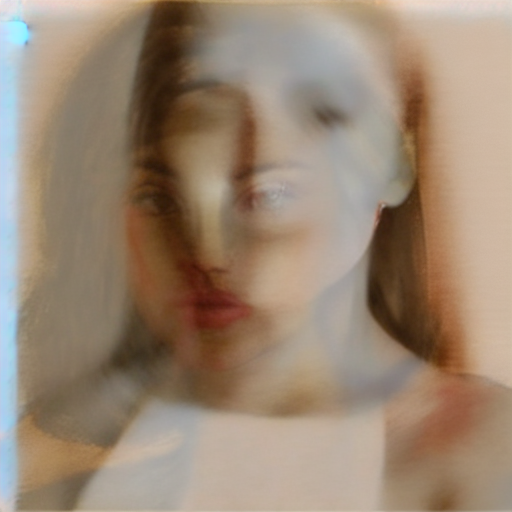

In [9]:
from PIL import Image
imgg = Image.fromarray(out[0])
imgg

In [ ]:
for i in range(10):
    os.makedirs("./Result/comb_17_time_frac0.7/",exist_ok=True)
    Image.fromarray(yaya[i][0]).save(f'./Result/comb_17_time_frac0.7/{i:03d}.png')

In [ ]:
from PIL import Image
imgg = Image.fromarray(out[0])
imgg.save("Result/interpolation/0_05.png")

In [ ]:
out = resize_image_to_squra("./test_imgs/h001.png",512)
Image.fromarray(out).save("./4.png")
out = resize_image_to_squra("./test_imgs/h002.png",512)
Image.fromarray(out).save("./5.png")

In [ ]:
import os
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./5.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'

out = process_interpolation_add_noise_diffuse(det='Depth_Zoe',input_image1=source1,input_image2=source2, alpha= 1,alpha_fram=0, time_frac=0.8, 
                                ddim_sampler=ddim_sampler_depth, model= model_depth, a_prompt=a_prompt,
                                n_prompt = n_prompt, num_samples = 1, 
                                image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 75, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200,only_language= False )

In [ ]:
import os
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./0.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'

out = process_interpolation_add_noise_diffuse(det='Canny',input_image1=source1,input_image2=source2, alpha= 0,alpha_fram=1, time_frac=0.7, 
                                ddim_sampler=ddim_sampler, model= model, a_prompt=a_prompt,
                                n_prompt = n_prompt, num_samples = 1, 
                                image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 100, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200,only_language= False )

In [ ]:
import os
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./5.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit, black person and poker'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'

out = process_interpolation(det='Depth_Zoe',input_image1=source1,input_image2=source2, alpha= 0.5 ,time_frac=0.85,
                                ddim_sampler=ddim_sampler_depth, model= model_depth, a_prompt=a_prompt,
                                n_prompt = n_prompt, num_samples = 4, 
                                image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 100, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200 )


In [ ]:
import os
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./5.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'
word1 = 'clown'
word2 = 'Soldier'
for i in range(31):
    os.makedirs("./Result/comb_10_with_middle_lnguage_030/",exist_ok=True)
    out = process_interpolation_add_noise_diffuse_with_language_interpolation_with_middle_lnguage(det='Depth_Zoe',input_image1=source1,input_image2=source2, alpha= i/30 ,
                                word1=word1,word2=word2,time_frac=0.30,detect_image = None,
                                ddim_sampler=ddim_sampler_depth, model= model_depth, a_prompt=a_prompt,
                                n_prompt = n_prompt, num_samples = 1, 
                                image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 100, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200 )
    Image.fromarray(out[0]).save(f'./Result/comb_10_with_middle_lnguage_030/{i:03d}.png')

In [ ]:
out.shape

In [ ]:
import os
from PIL import Image

source1 = cv2.imread("./5.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./4.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit.the great wall'
a_prompt = '4k'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'
os.makedirs("./Result/style5",exist_ok=True)

for i in range(10):
    ou = style_transfer_fixing_structure(det='Depth_Zoe',input_image1=source2,
                                time_frac=0.05*i + 0.5,detect_image = source1,noisylatend=None,
                                ddim_sampler=ddim_sampler_depth, model= model_depth, a_prompt=a_prompt,
                                n_prompt = n_prompt, num_samples = 1, 
                                image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 100, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200 )
    Image.fromarray(ou[0]).save(f'./Result/style5/with_promt{i:03d}.png')
    

In [ ]:
source1 = cv2.imread("./4.png")
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source2 = cv2.imread("./5.png")
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
prompt = 'best qualit'
a_prompt = ''
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality'
out = style_transfer_fixing_structure(det='Depth_Zoe',input_image1=source2,
                                time_frac=0.3,detect_image = source1,noisylatend=None,
                                ddim_sampler=ddim_sampler_depth, model= model_depth, a_prompt=a_prompt,
                                n_prompt = n_prompt, num_samples = 1, 
                                image_resolution = 512, prompt=prompt, detect_resolution=512, ddim_steps = 100, guess_mode =None, strength = 1, scale = 5, seed = 4, eta = 1, low_threshold = 100, high_threshold = 200 )

In [ ]:
from PIL import Image
imgg = Image.fromarray(out[0])
imgg 

In [ ]:
from PIL import Image
imgg = Image.fromarray(out[0])
imgg.save(f'./Result/style_transfer/great_wall/0.png')

In [ ]:
import imageio
with imageio.get_writer(uri='test6.gif', mode='I', fps=8) as writer:
    for i in range(30):
        writer.append_data(imageio.imread(f'Result/comb_1/{i:03d}.png'))


In [ ]:
import shutil
import os
from tqdm import trange
from PIL import Image
import yaml
def interpolate_naive(model,img1, img2, num_frames, out_dir='blend'):
    if isinstance(img1, Image.Image):
        img1 = torch.tensor(np.array(img1)).permute(2,0,1).unsqueeze(0).cuda()
        img2 = torch.tensor(np.array(img2)).permute(2,0,1).unsqueeze(0).cuda()
    ldm = model
    L1 = ldm.get_first_stage_encoding(ldm.encode_first_stage(img1.float() / 127.5 - 1.0))
    L2 = ldm.get_first_stage_encoding(ldm.encode_first_stage(img2.float() / 127.5 - 1.0))
    shutil.rmtree(out_dir, ignore_errors=True)
    os.makedirs(out_dir)
    for frame_ix in trange(1,num_frames-1):
        frac = frame_ix/(num_frames-1)
        latent = slerp(L1, L2, frac)
        x_samples = ldm.decode_first_stage(latent).permute(0, 2, 3, 1)
        x_samples = (x_samples * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)
        Image.fromarray(x_samples[0]).save(f'{out_dir}/{frame_ix:03d}.png')

In [ ]:
source1 = Image.open("./1.png")
source2 = Image.open("./0.png")
interpolate_naive(model_depth,source1, source2, 10, out_dir='blend')

In [ ]:
def get_latent_stack(model, img1, img2, timesteps, share_noise=True):
    ldm = model
    latents1 = [ldm.get_first_stage_encoding(ldm.encode_first_stage(img1))]
    latents2 = [ldm.get_first_stage_encoding(ldm.encode_first_stage(img2))]
    
    t_prev = None
    for t_now in timesteps[1:]:
        noise = torch.randn_like(latents1[-1])
        latents1.append(add_more_noise(model,latents1[-1], noise, t_now, t_prev))
        if not share_noise:
            noise = torch.randn_like(latents2[-1])
        latents2.append(add_more_noise(model,latents2[-1], noise, t_now, t_prev))
        t_prev = t_now
    return latents1, latents2

def add_more_noise(model, latents, noise, t2, t1=None):
    ldm = model
    if t1 is None:
        return ldm.sqrt_alphas_cumprod[t2] * latents + \
            ldm.sqrt_one_minus_alphas_cumprod[t2] * noise

    a1 = ldm.sqrt_alphas_cumprod[t1]
    sig1 = ldm.sqrt_one_minus_alphas_cumprod[t1]
    a2 = ldm.sqrt_alphas_cumprod[t2]
    sig2 = ldm.sqrt_one_minus_alphas_cumprod[t2]

    scale = a2/a1
    sigma = (sig2**2 - (scale * sig1)**2).sqrt()
    return scale * latents + sigma * noise
def get_step_schedule(min_steps, max_steps, num_levels, schedule_type='convex'):
    diff = max_steps - min_steps
    if schedule_type == 'concave':
        return [0]+[int(diff * x**.5)+min_steps for x in np.linspace(0, 1, num_levels)]
    elif schedule_type == 'convex':
        return [0]+[int(diff * x**2)+min_steps for x in np.linspace(0, 1, num_levels)]
    elif schedule_type == 'linear':
        return [0]+[int(x) for x in np.linspace(min_steps, max_steps, num_levels)]
def interpolate_then_diffuse(img1, img2, input_image1, input_image2, model, num_frames,ddim_sampler, controls=None, control_type='pose', min_steps=.25, max_steps=.5, prompt=None, n_prompt=None, ddim_steps=250, guide_scale=7.5, schedule_type='linear', optimize_cond=0, cond_path=None, cond_lr=1e-4, out_dir='blend'): #steps_per_frame=10, 
    """
    each successive frame has more noise than the previous
    """
    if min_steps < 1:
        min_steps = int(ddim_steps * min_steps)
    if max_steps < 1:
        max_steps = int(ddim_steps * max_steps)
    shutil.rmtree(out_dir, ignore_errors=True)
    os.makedirs(out_dir)

    if isinstance(img1, Image.Image):
        img1.save(f'{out_dir}/{0:03d}.png')
        img2.save(f'{out_dir}/{num_frames-1:03d}.png')
        img1 = torch.tensor(np.array(img1)).permute(2,0,1).unsqueeze(0).cuda()
        img2 = torch.tensor(np.array(img2)).permute(2,0,1).unsqueeze(0).cuda()
    preprocessor = ZoeDetector()
    ldm = model
    ldm.control_scales = [1] * 13

    if cond_path and os.path.exists(cond_path):
        assert optimize_cond > 0
        cond1, cond2, uncond_base = torch.load(cond_path)
    else:
        cond1 = ldm.get_learned_conditioning([prompt])
        uncond_base = ldm.get_learned_conditioning([n_prompt])

    cond = {"c_crossattn": [cond1], 'c_concat': None}
    un_cond = {"c_crossattn": [uncond_base], 'c_concat': None}

    img1 = img1.float() / 127.5 - 1.0
    img2 = img2.float() / 127.5 - 1.0
    # schedules include endpoints
    ddim_sampler.make_schedule(ddim_steps, verbose=False)
    step_schedule = get_step_schedule(min_steps, max_steps, (num_frames+1)//2, schedule_type=schedule_type)
    timestep_schedule = [ddim_sampler.ddim_timesteps[s] for s in step_schedule]
    latents1, latents2 = get_latent_stack(model,img1, img2, timestep_schedule)
    latents = [None] * num_frames
    latents[0] = latents1[0]
    latents[-1] = latents2[0]
    shape = latents[0].shape[-3:]
    input_image1 = HWC3(input_image1)
    input_image2 = HWC3(input_image2)

    kwargs = dict(cond_lr=cond_lr, cond_steps=optimize_cond, prompt=prompt, n_prompt=n_prompt, ddim_steps=ddim_steps, guide_scale=guide_scale, step_schedule=step_schedule)
    yaml.dump(kwargs, open(f'{out_dir}/args.yaml', 'w'))

    for frame_ix in trange(1,num_frames-1):
        frac = frame_ix/(num_frames-1)
        f = min(frame_ix, num_frames - frame_ix - 1)
        latents[frame_ix] = slerp(latents1[f], latents2[f], frac)
        
       
        detected_map1 = preprocessor(resize_image(input_image1, detect_resolution))
        detected_map2 = preprocessor(resize_image(input_image2, detect_resolution))
        detected_map1 = HWC3(detected_map1)
        detected_map2 = HWC3(detected_map2)
        
        img1 = resize_image(input_image1, image_resolution)
        img2 = resize_image(input_image2, image_resolution)
        H, W, C = img1.shape
        detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
        detected_map2 = cv2.resize(detected_map2, (W, H), interpolation=cv2.INTER_LINEAR)

        control1 = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
        control2 = torch.from_numpy(detected_map2.copy()).float().cuda() / 255.0
        control = slerp(control1,control2,frac)
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()
        cond["c_concat"] = un_cond["c_concat"] = [control]
        
        seed = random.randint(0, 65535)
        seed_everything(seed)


        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)


        samples, _ = ddim_sampler.sample(ddim_steps, 1,
            shape, cond, verbose=False,
            x_T=latents[frame_ix], timesteps=step_schedule[f],
            unconditional_guidance_scale=guide_scale,eta = 1,
            unconditional_conditioning=un_cond)

        x_samples = ldm.decode_first_stage(samples).permute(0, 2, 3, 1)
        x_samples = (x_samples * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)
        Image.fromarray(x_samples[0]).save(f'{out_dir}/{frame_ix:03d}.png')

In [ ]:
source1 = Image.open("./1.png")
source2 = Image.open("./0.png")
input_one = cv2.imread("./1.png")
input_one = cv2.cvtColor(input_one, cv2.COLOR_BGR2RGB)
input_two = cv2.imread("./0.png")
input_two = cv2.cvtColor(input_two, cv2.COLOR_BGR2RGB)

interpolate_then_diffuse(img1 = source1, img2 = source2, input_image1 = input_one, input_image2 = input_two, model = model_depth, num_frames = 10,ddim_sampler = ddim_sampler_depth, controls=None, control_type='pose', 
                         min_steps=.25, max_steps=.5, prompt=prompt, n_prompt=n_prompt, ddim_steps=25, guide_scale=7.5, schedule_type='linear', optimize_cond=0, cond_path=None, cond_lr=1e-4, out_dir='blend')


In [ ]:
from torchvision import transforms
def learn_conditioning(model,ddim_sampler, img1, img2, cond_base, uncond_base, ddim_steps, guide_scale, num_iters=200, cond_lr=1e-4):
        # augment = transforms.TrivialAugmentWide(num_magnitude_bins=20)
        augment = transforms.Compose([
            transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.2, hue=0.1),
            transforms.RandomResizedCrop(size=(512,512), scale=(0.7,1.0)),
        ])

        cond = {"c_crossattn": [cond_base], 'c_concat': None}
        un_cond = {"c_crossattn": [uncond_base], 'c_concat': None}
        ldm = model
        uncond_base.requires_grad_(True)
        cond1 = cond_base
        cond2 = cond_base.clone()
        cond1.requires_grad_(True)
        cond2.requires_grad_(True)
        optimizer = torch.optim.Adam([cond1, cond2, uncond_base], lr=cond_lr) #
        T = ddim_steps
        ddim_sampler.make_schedule(T, verbose=False)
        for cur_iter in range(num_iters):
            L1 = ldm.get_first_stage_encoding(ldm.encode_first_stage(augment(img1).float() / 127.5 - 1.0))
            L2 = ldm.get_first_stage_encoding(ldm.encode_first_stage(augment(img2).float() / 127.5 - 1.0))
            with torch.autocast('cuda'):
                u = np.random.randint(T//3, 2*T//3)
                t_u = ddim_sampler.ddim_timesteps[u]
                tu = torch.tensor([t_u], device='cuda', dtype=torch.long)

                cond["c_crossattn"] = [cond1]
                noise = torch.randn_like(L1)
                x_t_u = ldm.sqrt_alphas_cumprod[t_u] * L1 + \
                    ldm.sqrt_one_minus_alphas_cumprod[t_u] * noise
                eps = ddim_sampler.pred_eps(x_t_u, cond, tu, unconditional_guidance_scale=guide_scale, unconditional_conditioning=un_cond)
                loss1 = (eps - noise).pow(2).mean()
                loss1.backward()
                optimizer.step()
                optimizer.zero_grad(set_to_none=True)

                cond["c_crossattn"] = [cond2]
                noise = torch.randn_like(L2)
                x_t_u = ldm.sqrt_alphas_cumprod[t_u] * L2 + \
                    ldm.sqrt_one_minus_alphas_cumprod[t_u] * noise
                eps = ddim_sampler.pred_eps(x_t_u, cond, tu, unconditional_guidance_scale=guide_scale, unconditional_conditioning=un_cond)
                loss2 = (eps - noise).pow(2).mean()
                loss2.backward()

                optimizer.step()
                optimizer.zero_grad(set_to_none=True)
                # if cur_iter % 50 == 0:
                #     print(f'iter {cur_iter}: {loss1.item()}, {loss2.item()}')

        cond1.requires_grad_(False)
        cond2.requires_grad_(False)
        uncond_base.requires_grad_(False)
        return cond1, cond2, uncond_base
def interpolate(model, img1, img2, input_image1, input_image2,ddim_sampler, controls=None, control_type='pose', prompt=None, n_prompt=None, min_steps=.25, 
                max_steps=.5, ddim_steps=250, num_frames=17, guide_scale=7.5, schedule_type='linear', optimize_cond=0, 
                cond_interp='spherical', cond_path=None, cond_lr=1e-4, bias=0, retroactive_interp=True, share_noise=True, out_dir='blend'):
        """
        ddim_steps: number of steps in DDIM sampling
        num_frames: includes endpoints (both original images)
        """
        if min_steps < 1:
            min_steps = int(ddim_steps * min_steps)
        if max_steps < 1:
            max_steps = int(ddim_steps * max_steps)
        shutil.rmtree(out_dir, ignore_errors=True)
        os.makedirs(out_dir)
    
        if isinstance(img1, Image.Image):
            img1.save(f'{out_dir}/{0:03d}.png')
            img2.save(f'{out_dir}/{num_frames-1:03d}.png')
            img1 = torch.tensor(np.array(img1)).permute(2,0,1).unsqueeze(0).cuda()
            img2 = torch.tensor(np.array(img2)).permute(2,0,1).unsqueeze(0).cuda()

        preprocessor = ZoeDetector()
        ldm = model
        ldm.control_scales = [1] * 13

        cond1 = ldm.get_learned_conditioning([prompt])
        uncond_base = ldm.get_learned_conditioning([n_prompt])
        if optimize_cond:
            cond1, cond2, uncond_base = learn_conditioning( model=model, ddim_sampler=ddim_sampler,img1 =img1, img2 = img2, cond_base = cond1, uncond_base = uncond_base, ddim_steps = ddim_steps, guide_scale=guide_scale, num_iters=optimize_cond, cond_lr=cond_lr)
        detected_map1 = preprocessor(resize_image(input_image1, detect_resolution))
        detected_map2 = preprocessor(resize_image(input_image2, detect_resolution))
        detected_map1 = HWC3(detected_map1)
        detected_map2 = HWC3(detected_map2)
        
        img11 = resize_image(input_image1, image_resolution)
        img21 = resize_image(input_image2, image_resolution)
        H, W, C = img11.shape
        detected_map1 = cv2.resize(detected_map1, (W, H), interpolation=cv2.INTER_LINEAR)
        detected_map2 = cv2.resize(detected_map2, (W, H), interpolation=cv2.INTER_LINEAR)

        control1 = torch.from_numpy(detected_map1.copy()).float().cuda() / 255.0
        control2 = torch.from_numpy(detected_map2.copy()).float().cuda() / 255.0

        cond = {"c_crossattn": [cond1], 'c_concat': None}
        un_cond = {"c_crossattn": [uncond_base], 'c_concat': None}

        img1 = img1.float() / 127.5 - 1.0
        img2 = img2.float() / 127.5 - 1.0
        # schedules include endpoints
        num_levels = int(np.log2(num_frames-1)) # does not include endpoints
        assert np.log2(num_frames-1) % 1 < 1e-5
        ddim_sampler.make_schedule(ddim_steps, verbose=False)
        step_schedule = get_step_schedule(min_steps, max_steps, num_levels, schedule_type=schedule_type)
        timesteps = ddim_sampler.ddim_timesteps
        timestep_schedule = [timesteps[s] for s in step_schedule]
        latents1, latents2 = get_latent_stack(model,img1, img2, timestep_schedule, share_noise=share_noise)
        latents = [None] * num_frames
        latents[0] = latents1[0]
        latents[-1] = latents2[0]
        
        kwargs = dict(cond_lr=cond_lr, cond_steps=optimize_cond, prompt=prompt, n_prompt=n_prompt, ddim_steps=ddim_steps, guide_scale=guide_scale, step_schedule=step_schedule, bias=bias, retroactive_interp=retroactive_interp, share_noise=share_noise)
        yaml.dump(kwargs, open(f'{out_dir}/args.yaml', 'w'))
        
        interpolate_latents = slerp

        for level in trange(1,num_levels+1):
            cur_ix = step_schedule[-level]
            prev_ix = step_schedule[-level-1]
            latents[0] = latents1[-level]
            latents[-1] = latents2[-level]
            df = 2**(num_levels-level)

            for frame_ix in range(df, num_frames-1, df*2):
                frac = .5
                if frame_ix-df == 0:
                    frac -= bias
                if frame_ix+df == num_frames-1:
                    frac += bias
                latents[frame_ix] = interpolate_latents(latents[frame_ix-df], latents[frame_ix+df], frac)

            if retroactive_interp:
                if level == 2:
                    latents[num_frames//2] = interpolate_latents(latents[num_frames//4], latents[3*num_frames//4], .5)
                
                if level == 3:
                    latents[num_frames//4] = interpolate_latents(latents[num_frames//8], latents[3*num_frames//8], .5)
                    latents[num_frames//2] = interpolate_latents(latents[3*num_frames//8], latents[5*num_frames//8], .5)
                    latents[3*num_frames//4] = interpolate_latents(latents[5*num_frames//8], latents[7*num_frames//8], .5)
            
            for frame_ix in range(df, num_frames-1, df): # exclude endpoints
                frac = frame_ix/(num_frames-1)

                control = slerp(control1,control2,frac)
                control = torch.stack([control for _ in range(num_samples)], dim=0)
                control = einops.rearrange(control, 'b h w c -> b c h w').clone()
                cond["c_concat"] = un_cond["c_concat"] = [control]

                
                for i, t in enumerate(np.flip(timesteps[prev_ix:cur_ix])):
                    index = cur_ix - i - 1
                    ts = torch.tensor([t], device='cuda', dtype=torch.long)
 
                    latents[frame_ix] = ddim_sampler.p_sample_ddim(latents[frame_ix], cond, ts, index=index, unconditional_guidance_scale=guide_scale,
                    unconditional_conditioning=un_cond)[0]

        for frame_ix in range(1,num_frames-1):
            x_samples = ldm.decode_first_stage(latents[frame_ix]).permute(0, 2, 3, 1)
            x_samples = (x_samples * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)
            Image.fromarray(x_samples[0]).save(f'{out_dir}/{frame_ix:03d}.png')

In [ ]:
import numpy as np
 
from PIL import Image
 
def image_contact(input_path,output_path,axis):
    paths = input_path
    img_array = ''
    img = ''
    for i, v in enumerate(paths):
        if i == 0:
            img = Image.open(v)  # 打开图片
            img_array = np.array(img)  # 转化为np array对象
        if i > 0:
            img_array2 = np.array(Image.open(v))
            img_array = np.concatenate((img_array, img_array2), axis=axis)  # 横向拼接
            # img_array = np.concatenate((img_array, img_array2), axis=0)  # 纵向拼接
            img = Image.fromarray(img_array)
    img.save(output_path)
def Return_compact_numpy(input_path,axis):
    paths = input_path
    img_array = ''
    img = ''
    for i, v in enumerate(paths):
        if i == 0:
            img = Image.open(v)  # 打开图片
            img_array = np.array(img)  # 转化为np array对象
        if i > 0:
            img_array2 = np.array(Image.open(v))
            img_array = np.concatenate((img_array, img_array2), axis=axis)  # 横向拼接
            # img_array = np.concatenate((img_array, img_array2), axis=0)  # 纵向拼接
    return img_array
tep = []
path_style = "./Result/comb_18"
for i,filename in enumerate(os.listdir(path_style)):
    tep.append(os.path.join(path_style,filename))

In [ ]:
row = 8
columne = 10
for i in range(row):
    if i == 0:
        img_array = Return_compact_numpy(tep[i*columne: (i+1)*columne],1)
    else:
        img_array_2 = Return_compact_numpy(tep[i*columne: (i+1)*columne],1)
        img_array = np.concatenate((img_array, img_array_2), axis=0)


In [ ]:
img = Image.fromarray(img_array)
img.save("./Result/comb_18/final.png")

In [ ]:
import numpy as np
 
from PIL import Image
 
paths = ['./0.png' ,'./test_imgs/111.png','./test_imgs/001.png','./test_imgs/002.png','./test_imgs/003.png','./test_imgs/004.png']
img_array = ''
img = ''
for i, v in enumerate(paths):
    if i == 0:
        img_array = resize_image_to_squra(v,512)

        img = Image.open(v)  # 打开图片
        img_array = np.array(img)  # 转化为np array对象
    if i > 0:
        img_array2 = resize_image_to_squra(v,512)

        img_array = np.concatenate((img_array, img_array2), axis=1)  # 横向拼接
        # img_array = np.concatenate((img_array, img_array2), axis=0)  # 纵向拼接
        img = Image.fromarray(img_array)
 
 
 
# 保存图片
img.save('test1.jpg')

In [ ]:
import numpy as np
 
from PIL import Image
 
paths = ['./style1.png','./style2.png']
img_array = ''
img = ''
for i, v in enumerate(paths):
    if i == 0:
        img = Image.open(v)  # 打开图片
        img_array = np.array(img)  # 转化为np array对象
    if i > 0:
        img_array2 = np.array(Image.open(v))
        img_array = np.concatenate((img_array, img_array2), axis=0)  # 横向拼接
        # img_array = np.concatenate((img_array, img_array2), axis=0)  # 纵向拼接
        img = Image.fromarray(img_array)
 
 
 
 
 
# 保存图片
img.save('testt.jpg')